In [73]:
import opendatasets as od

In [74]:
od.download("https://www.kaggle.com/competitions/bike-sharing-demand/data?select=test.csv")

Skipping, found downloaded files in ".\bike-sharing-demand" (use force=True to force download)


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [93]:
train_df = pd.read_csv("./bike-sharing-demand/train.csv")
test_df = pd.read_csv("./bike-sharing-demand/test.csv")
submission_df = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")

In [94]:
train_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [95]:
test_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [96]:
submission_df.head(5)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [97]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [98]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [99]:
def convert_to_datetime(df):
    df["datetime"] = pd.to_datetime(df["datetime"])
    df['year'] = df["datetime"].dt.year
    df["day_of_week"] = df["datetime"].dt.day_of_week
    df["hour"] = df["datetime"].dt.hour    
    df["month"] = df["datetime"].dt.month

In [100]:
convert_to_datetime(train_df)

In [101]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day_of_week,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,5,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,5,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,5,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,2,19,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,2,20,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,2,21,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,2,22,12


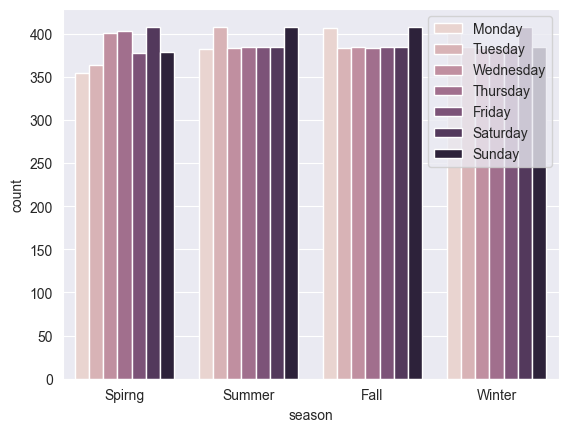

In [102]:
sns.countplot(train_df, x="season", hue="day_of_week")
plt.legend(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(list(range(0, 4)),labels = ["Spirng", "Summer", "Fall", "Winter"])
plt.show()
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

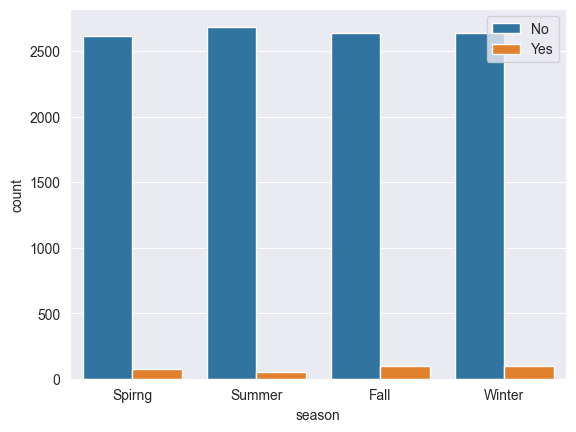

In [103]:
sns.countplot(train_df, x="season", hue="holiday")
plt.legend(["No", "Yes"])
plt.xticks(list(range(0, 4)),labels = ["Spirng", "Summer", "Fall", "Winter"])
plt.show()

<Axes: xlabel='month', ylabel='count'>

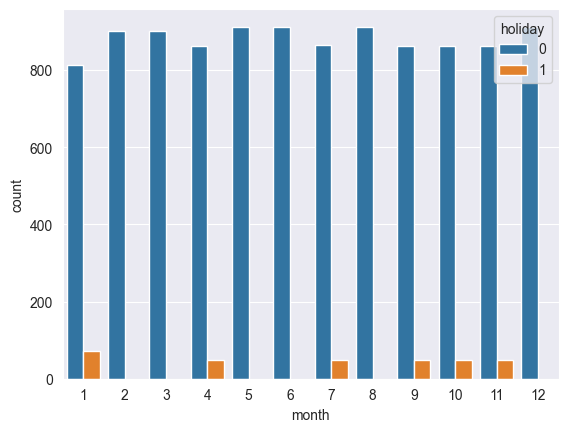

In [104]:
sns.countplot(train_df, x="month", hue="holiday")

In [105]:
train_df.groupby("month", as_index=False).mean(["day_of_week"])

,month,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day_of_week,hour
0,1,1.0,0.080317,0.622172,1.400452,9.840000,12.077579,55.911765,14.582959,8.203620,82.162896,90.366516,2011.512443,2.938914,11.730769
1,2,1.0,0.000000,0.708102,1.458380,11.798535,14.532608,56.296337,13.963707,10.318535,99.684795,110.003330,2011.504994,3.136515,11.597114
2,3,1.0,0.000000,0.710322,1.413984,15.902175,19.017220,56.678135,15.363249,27.809101,120.360710,148.169811,2011.504994,3.077691,11.601554
3,4,2.0,0.052805,0.656766,1.432343,18.718372,22.305891,55.697470,15.581090,43.798680,140.361936,184.160616,2011.499450,2.954895,11.526953
4,5,2.0,0.000000,0.736842,1.527412,22.674079,26.632374,68.084430,12.293956,45.268640,174.190789,219.459430,2011.500000,2.921053,11.500000
5,6,2.0,0.000000,0.684211,1.309211,27.064496,30.988750,58.759868,12.348930,53.260965,188.770833,242.031798,2011.500000,3.157895,11.500000
6,7,3.0,0.052632,0.657895,1.255482,30.841711,34.900395,58.402412,11.019928,55.862939,179.462719,235.325658,2011.500000,2.947368,11.500000
7,8,3.0,0.000000,0.736842,1.351974,29.736689,33.122001,63.010965,11.931179,50.296053,183.822368,234.118421,2011.500000,3.000000,11.500000
8,9,3.0,0.052805,0.630363,1.492849,25.779032,29.590248,70.980198,11.575698,50.496150,183.309131,233.805281,2011.501650,3.058306,11.531353
9,10,4.0,0.052689,0.683864,1.527991,20.933853,24.739682,69.412733,11.226457,41.807903,185.891328,227.699232,2011.500549,2.843030,11.509330


In [106]:
train_df[["count", "season", "temp", "humidity"]].groupby("season", as_index=False).mean()

,season,count,temp,humidity
0,1,116.343261,12.530491,56.297841
1,2,215.251372,22.823483,60.852909
2,3,234.417124,28.789111,64.123674
3,4,198.988296,16.649239,66.173738


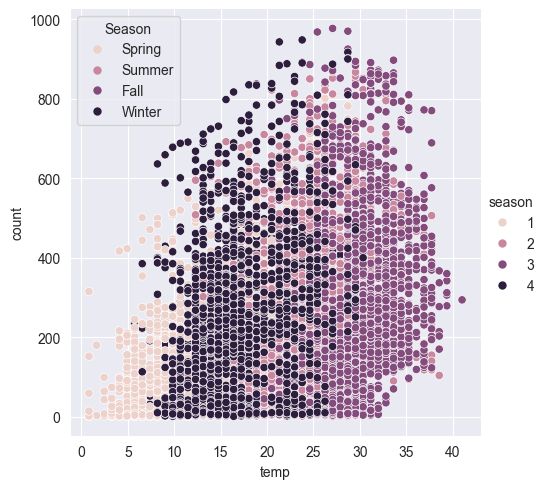

In [107]:
plot = sns.relplot(
    train_df,
    x="temp",
    y="count",
    hue="season",
    legend=["Spirng", "Summer", "Fall", "Winter"],
)
handles, labels = plot.ax.get_legend_handles_labels()
spring_labels = ["Spring", "Summer", "Fall", "Winter"]
plot.ax.legend(handles,spring_labels, title="Season")
plt.show()

<Axes: xlabel='count', ylabel='Count'>

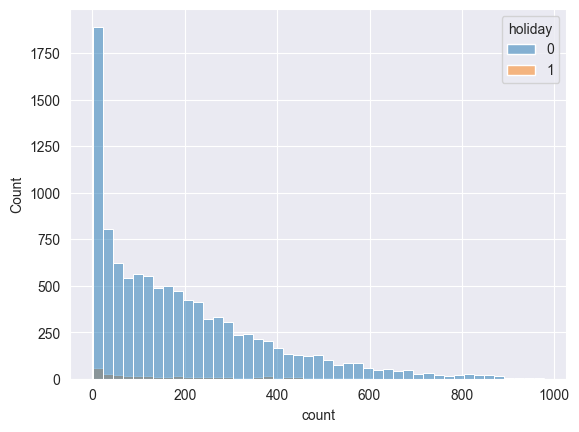

In [108]:
sns.histplot(train_df, x="count", hue="holiday")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day_of_week,hour,month
